USING CNN TO APPLY FILTERS ON THE GIVEN IMAGE.

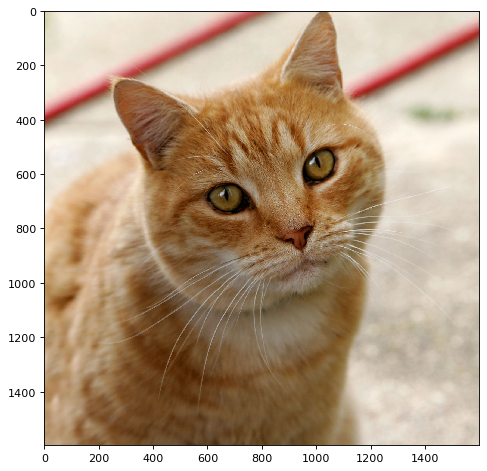

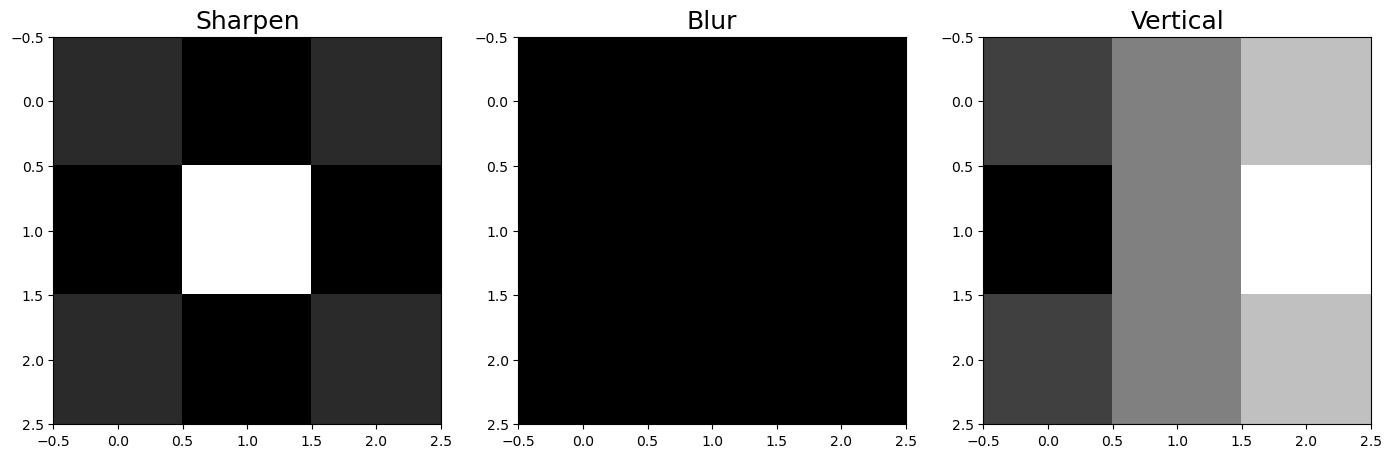

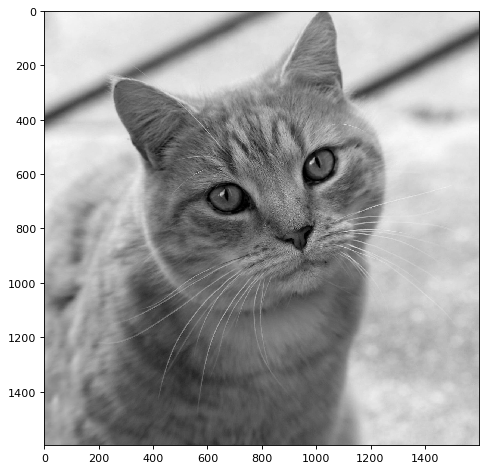

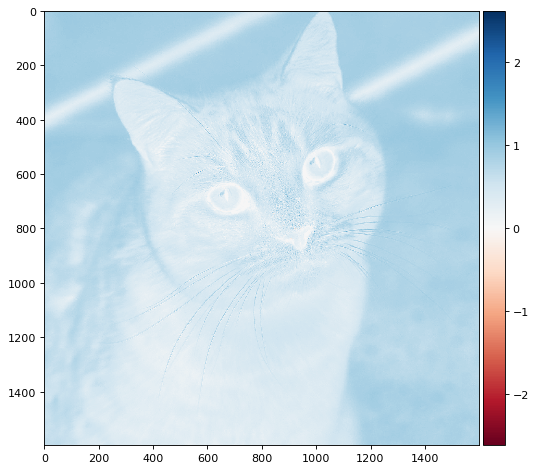

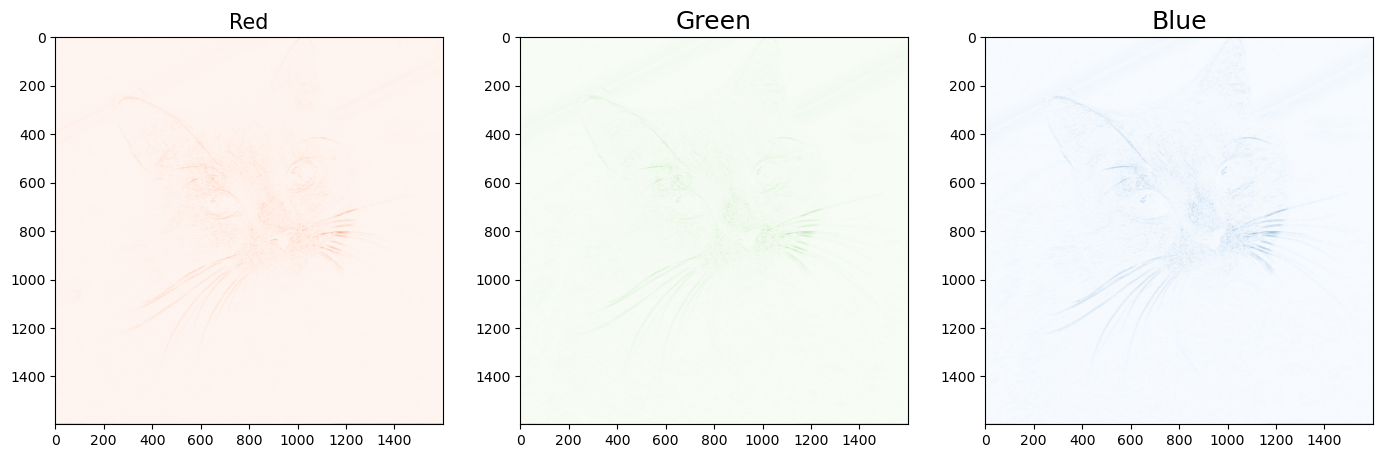

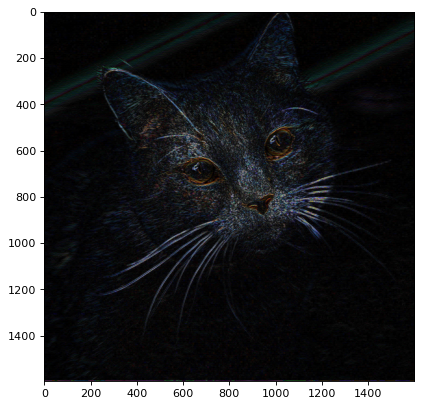

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d




#Reading Image
Lion = imread(" ")
plt.figure(num=None, figsize=(8,6), dpi=80)
imshow(Lion)




#Filter MAtrices

sharpen = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

blur = np.array([[0.11,0.11,0.11],
                    [0.11,0.11,0.11],
                    [0.11,0.11,0.11]])


vertical = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])


gaussian = (1/16.0) * np.array([[1,2,1],
                                [2,4,2],
                                [1,2,1]])




#plotting the filters
fig,ax = plt.subplots(1,3, figsize = (17,10))
ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title(f'Sharpen', fontsize=18)

ax[1].imshow(blur, cmap='gray')
ax[1].set_title(f'Blur', fontsize=18)

ax[2].imshow(vertical, cmap='gray')
ax[2].set_title(f'Vertical', fontsize=18)




#Grayscaling Image
Lion_gray = rgb2gray(Lion)
plt.figure(num=None, figsize=(8,6), dpi=80)
imshow(Lion_gray)




#Function for applying filters
def multi_convolver(image, kernel, iterations):
  for i in range(iterations):
    image = convolve2d(image, kernel, 'same', boundary = 'fill', fillvalue = 0)
  return image

convolved_image = multi_convolver(Lion_gray, sharpen, 1)

plt.figure(num=None, figsize=(8,6), dpi=80)
imshow(convolved_image);




#For colored Image
def convolver_rgb(image, kernel, iterations = 1):
  convolved_image_r = multi_convolver(image[:,:,0], kernel, iterations)
  convolved_image_g = multi_convolver(image[:,:,1], kernel, iterations)
  convolved_image_b = multi_convolver(image[:,:,2], kernel, iterations)

  reformed_image = np.dstack((np.rint(abs(convolved_image_r)),np.rint(abs(convolved_image_g)),np.rint(abs(convolved_image_b))))/255

  fig,ax = plt.subplots(1,3, figsize = (17,10))

  ax[0].imshow(abs(convolved_image_r), cmap='Reds')
  ax[0].set_title(f'Red', fontsize=15)

  ax[1].imshow(abs(convolved_image_g), cmap='Greens')
  ax[1].set_title(f'Green', fontsize=18)

  ax[2].imshow(abs(convolved_image_b), cmap='Blues')
  ax[2].set_title(f'Blue', fontsize=18)

  return np.array(reformed_image*255).astype(np.uint8)




#Can add different filters (defined above) here
convolved_rgb_gauss = convolver_rgb(Lion, vertical.T ,1)




plt.figure(num=None, figsize=(8,6), dpi=80)
plt.imshow(convolved_rgb_gauss,vmin=0,vmax=255);

CNN PARAMETER CALCULATION

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D




model = Sequential()
model.add(Conv2D(32, input_shape=(28,28,3),
                 kernel_size = (5,5),
                 padding='same',
                 use_bias=False))
model.add(Conv2D(17, (3,3), padding='same', use_bias=False))
model.add(Conv2D(13, (3,3), padding='same', use_bias=False))
model.add(Conv2D(7, (3,3), padding='same', use_bias=False))

model.compile(loss = 'categorical_crossentropy', optimizer='adam')

model.summary()




model = Sequential()
model.add(Conv2D(32, input_shape=(28,28,3),
                 kernel_size = (5,5),
                 padding='same',
                 use_bias=True))
model.add(Conv2D(17, (3,3), padding='same', use_bias=True))
model.add(Conv2D(13, (3,3), padding='same', use_bias=True))
model.add(Conv2D(7, (3,3), padding='same', use_bias=True))

model.compile(loss = 'categorical_crossentropy', optimizer='adam')

model.summary()




model = Sequential()
model.add(Conv2D(10, input_shape=(28,28,3),
                 kernel_size = (5,5),
                 strides = (1,1),
                 padding='valid',
                 use_bias=False))
model.add(Conv2D(20, (5,5), (2,2), padding='valid', use_bias=False))
model.add(Conv2D(40, (5,5), (2,2), padding='valid', use_bias=False))

model.compile(loss = 'categorical_crossentropy', optimizer='adam')

model.summary()




model = Sequential()
model.add(Conv2D(10, input_shape=(39,39,3),
                 kernel_size = (3,3),
                 padding='valid',))
model.add(Conv2D(20, (5,5), (2,2), padding='valid' ))
model.add(Conv2D(40, (5,5), (2,2),padding='valid'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam')

model.summary()

C:\Users\Lalit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 17)     │         4,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 13)     │         1,989 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 7)      │           819 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,104 (39.47 KB)

 Trainable params: 10,104 (39.47 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 17)     │         4,913 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 13)     │         2,002 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 7)      │           826 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,173 (39.74 KB)

 Trainable params: 10,173 (39.74 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 10)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 20)     │         5,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 3, 3, 40)       │        20,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,750 (100.59 KB)

 Trainable params: 25,750 (100.59 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 37, 37, 10)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 17, 17, 20)     │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 40)       │        20,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,340 (98.98 KB)

 Trainable params: 25,340 (98.98 KB)

 Non-trainable params: 0 (0.00 B)

MAX POOLING

In [11]:
import tensorflow as tf
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.],
                 [7., 8., 9.]])
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')
max_pool_2d(x)




x = tf.constant([[1., 2., 3., 4.],
                 [5., 6., 7., 8.],
                 [9., 10., 11., 12.]])
x = tf.reshape(x, [1, 3, 4, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(2, 2), padding='valid')
max_pool_2d(x)




x = tf.constant([[1., 2., 3., 4.],
                 [5., 6., 7., 8.],
                 [9., 10., 11., 12.]])
x = tf.reshape(x, [1, 3, 4, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(2, 2), padding='same')
max_pool_2d(x)




x = tf.constant([[1., 2., 3., 4.],
                 [5., 6., 7., 8.],
                 [9., 10., 11., 12.]])
x = tf.reshape(x, [1, 3, 4, 1])
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
   strides=(1, 1), padding='same')
max_pool_2d(x)






<tf.Tensor: shape=(1, 3, 4, 1), dtype=float32, numpy=
array([[[[ 6.],
         [ 7.],
         [ 8.],
         [ 8.]],

        [[10.],
         [11.],
         [12.],
         [12.]],

        [[10.],
         [11.],
         [12.],
         [12.]]]], dtype=float32)>